# 将整个数据集不划分训练和测试数据集

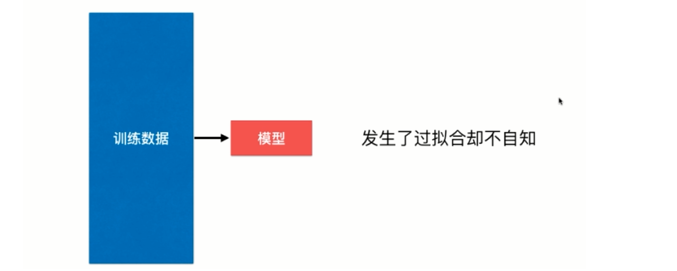

将整个数据集都当成训练数据，有可能会导致过拟合，训练出来的模型在当前数据集上
可能会得到很好的结果，但是针对测试数据集(一个模型未知的数据集)来说，模型可能就不会达到很好的效果。

# 将整个数据集划分测试集和训练集

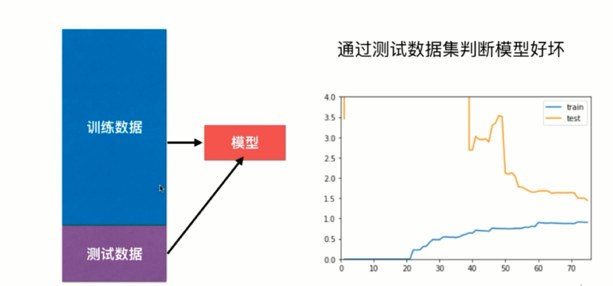

通过训练数据来构建模型，通过测试数据来测试模型的好坏。此时，我们可以通过观察学习曲线的走向，来判断模型是否过拟合或者欠拟合，然后进行调参。

# 有时，模型可能会在特定的测试数据集上产生过拟合

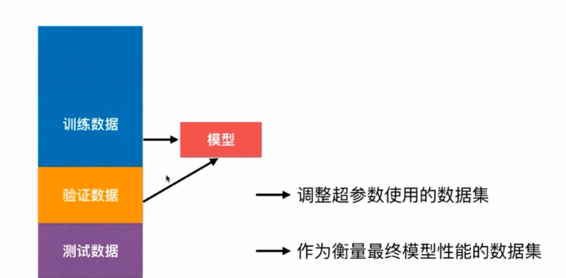

所以，我们将数据分为训练数据、验证数据和测试数据，用训练数据来构建模型，验证数据来调整模型，使得模型达到最优，然后利用测试数据集衡量模型性能

# 交叉验证

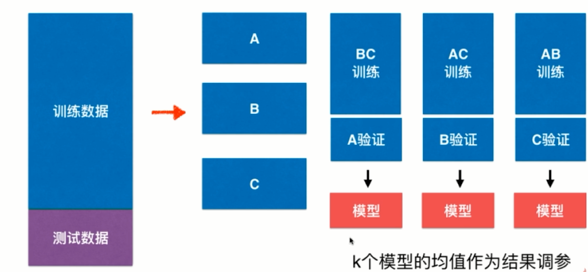

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

# 使用train_test_split来调参

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0, 0, 0

for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_k = k
            best_p = p
print("Best K =",best_k)
print("Best P =",best_p)
print("Best Score =",best_score)

Best K = 3
Best P = 4
Best Score = 0.9860917941585535


# 使用交叉验证来调参

In [4]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
cross_val_score(knn, X_train, y_train)

c:\softwares\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.98895028, 0.97777778, 0.96629213])

In [6]:
best_score, best_p, best_k = 0, 0, 0

for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_k = k
            best_p = p
print("Best K =",best_k)
print("Best P =",best_p)
print("Best Score =",best_score)

c:\softwares\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\softwares\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\softwares\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\softwares\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying 

c:\softwares\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\softwares\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\softwares\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\softwares\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying 

Best K = 2
Best P = 2
Best Score = 0.9823599874006478


In [7]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)

best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.980528511821975

# 网格搜索

In [8]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_grid = [
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(2,11)],
        "p":[i for i in range(1,6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

c:\softwares\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   15.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [9]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [10]:
grid_search.best_score_

0.9823747680890538

In [12]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

0.980528511821975

In [13]:
cross_val_score(knn_clf, X_train, y_train, cv=5)

array([0.99543379, 0.97716895, 0.97685185, 0.98130841, 0.97142857])

In [14]:
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=1,cv=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   28.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [15]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [16]:
grid_search.best_score_

0.9851576994434137

In [17]:
knn = grid_search.best_estimator_
knn.score(X_test, y_test)

0.980528511821975